# Project 1: Part 2 (Pneumonia)

## Task 1: Exploratory Data Analysis
Below, a first analysis of the data is shown, whereby an imbalance between normal and infected samples was notices immediately. Especially the train split contains almost double the amount of infected samples compared to healthy samples.

### Analysis

<AxesSubplot: >

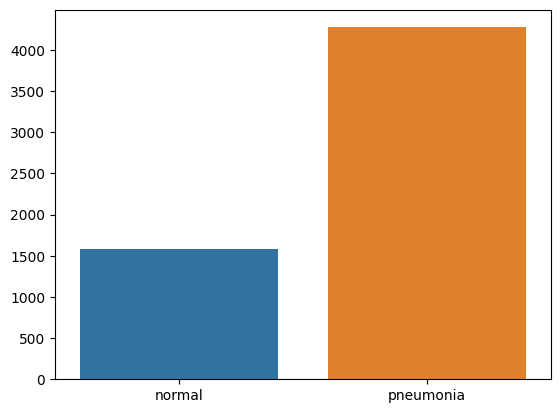

In [94]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# inspect the data
os.listdir('chest_xray/chest_xray')

# analyze number of images in each folder
train_normal = os.listdir('chest_xray/chest_xray/train/NORMAL')
train_pneumonia = os.listdir('chest_xray/chest_xray/train/PNEUMONIA')
test_normal = os.listdir('chest_xray/chest_xray/test/NORMAL')
test_pneumonia = os.listdir('chest_xray/chest_xray/test/PNEUMONIA')
val_normal = os.listdir('chest_xray/chest_xray/val/NORMAL')
val_pneumonia = os.listdir('chest_xray/chest_xray/val/PNEUMONIA')

# create a dataframe
df = pd.DataFrame({'train_normal': [len(train_normal)], 'train_pneumonia': [len(train_pneumonia)], 'test_normal': [len(test_normal)], 'test_pneumonia': [len(test_pneumonia)], 'val_normal': [len(val_normal)], 'val_pneumonia': [len(val_pneumonia)]})

# visualize normal vs pneumonia
normal = len(train_normal) + len(test_normal) +len(val_normal)
pneumonia = len(train_pneumonia) + len(test_pneumonia) + len(val_pneumonia)
df = pd.DataFrame({'normal': [normal], 'pneumonia': [pneumonia]})
sns.barplot(data=df)

### Preprocessing

In [8]:
import cv2
import os
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [9]:
# load data
train = get_data('chest_xray/chest_xray/train')
test = get_data('chest_xray/chest_xray/test')
val = get_data('chest_xray/chest_xray/val')

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/tmp/ipykernel_9700/2527081360.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [10]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [11]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [12]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [109]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
    rotation_range=20,
    # grayscale
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

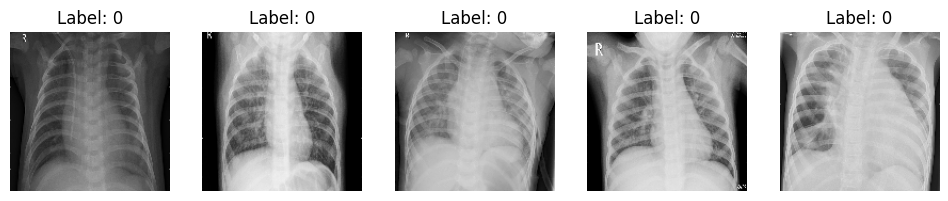

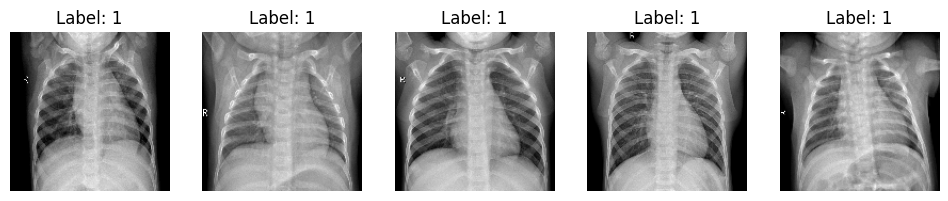

In [134]:
# visualize train data (5 normal)
plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i].reshape(img_size, img_size), cmap='gray')
    plt.axis('off')
    plt.title('Label: {}'.format(y_train[i]))

# 5 pneumonia
plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i+4000].reshape(img_size, img_size), cmap='gray')
    plt.axis('off')
    plt.title('Label: {}'.format(y_train[i+4000]))

## Task 2: Build CNN classifier

In [226]:
# build the CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# create the model
pneumonia_clf = Sequential()
pneumonia_clf.add(Conv2D(32, (3, 3), input_shape = (150, 150, 1), activation = 'relu'))
pneumonia_clf.add(BatchNormalization())
pneumonia_clf.add(MaxPooling2D(pool_size = (2, 2)))
pneumonia_clf.add(Dropout(0.1))

pneumonia_clf.add(Conv2D(64, (3, 3), activation = 'relu'))
pneumonia_clf.add(BatchNormalization())
pneumonia_clf.add(MaxPooling2D(pool_size = (2, 2)))
pneumonia_clf.add(Dropout(0.2))

pneumonia_clf.add(Flatten())
pneumonia_clf.add(Dense(units = 64, activation = 'relu'))
pneumonia_clf.add(Dropout(0.2))
pneumonia_clf.add(Dense(units = 1, activation = 'sigmoid'))
pneumonia_clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
pneumonia_clf.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 batch_normalization_42 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_96 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_78 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_43 (Bat  (None, 72, 72, 64)     

In [227]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [228]:
# train the CNN
history = pneumonia_clf.fit(data_generator.flow(x_train, y_train, batch_size=32), epochs=20, validation_data = data_generator.flow(x_val, y_val), callbacks=[learning_rate_reduction])

Epoch 1/20
163/163 [==============================] - 6s 33ms/step - loss: 0.3821 - accuracy: 0.8276 - val_loss: 0.6945 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
163/163 [==============================] - 5s 33ms/step - loss: 0.2623 - accuracy: 0.8930 - val_loss: 0.8347 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/20
163/163 [==============================] - ETA: 0s - loss: 0.2443 - accuracy: 0.9001
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 5s 33ms/step - loss: 0.2443 - accuracy: 0.9001 - val_loss: 0.9373 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/20
163/163 [==============================] - 5s 34ms/step - loss: 0.2044 - accuracy: 0.9195 - val_loss: 0.6059 - val_accuracy: 0.7500 - lr: 3.0000e-04
Epoch 5/20
163/163 [==============================] - 5s 33ms/step - loss: 0.1890 - accuracy: 0.9245 - val_loss: 0.6462 - val_accuracy: 0.6875 - lr: 3.0000e-04
Epoch 6/20
163/163 [==============================]

In [229]:
# inference on test set
pneumonia_clf.evaluate(x_test, y_test)

20/20 [==============================] - 0s 3ms/step - loss: 0.3089 - accuracy: 0.8814


[0.30886924266815186, 0.8814102411270142]

### Analysis of training

20/20 [==============================] - 0s 3ms/step


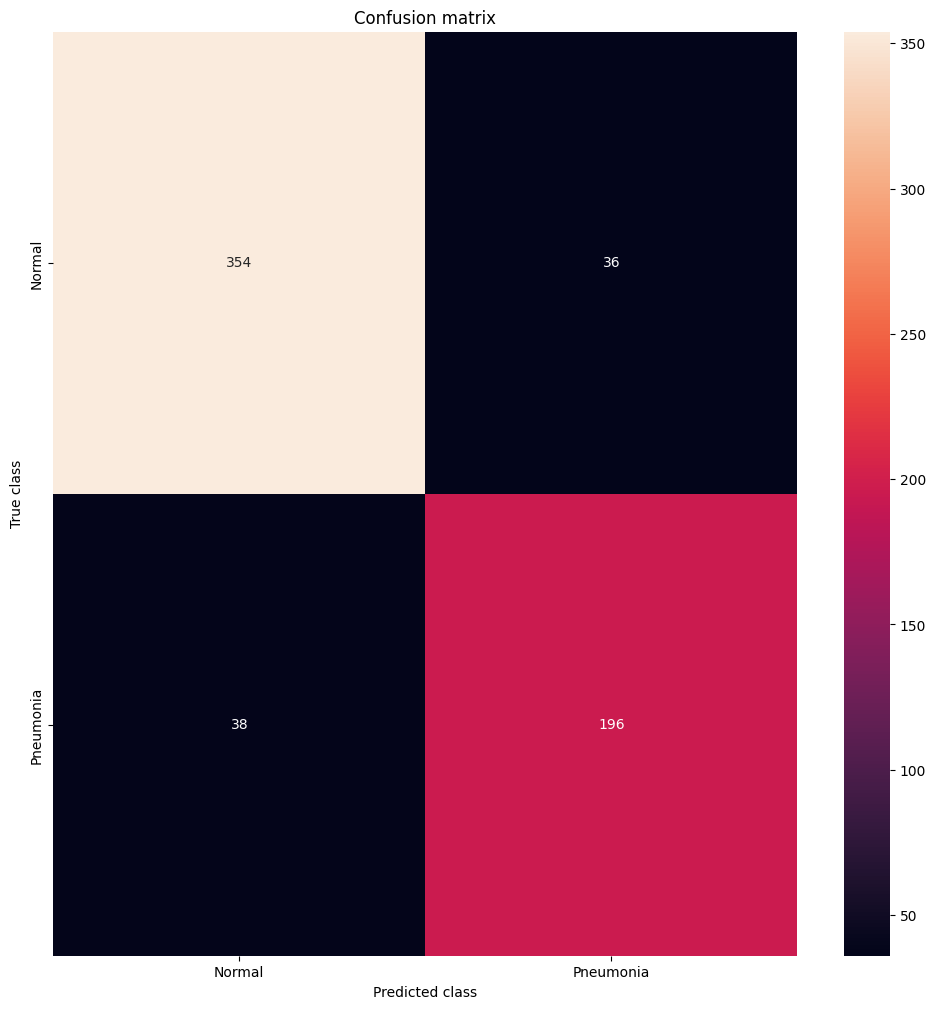

In [230]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = pneumonia_clf.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

# axis labels
LABELS = ['Normal', 'Pneumonia']

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

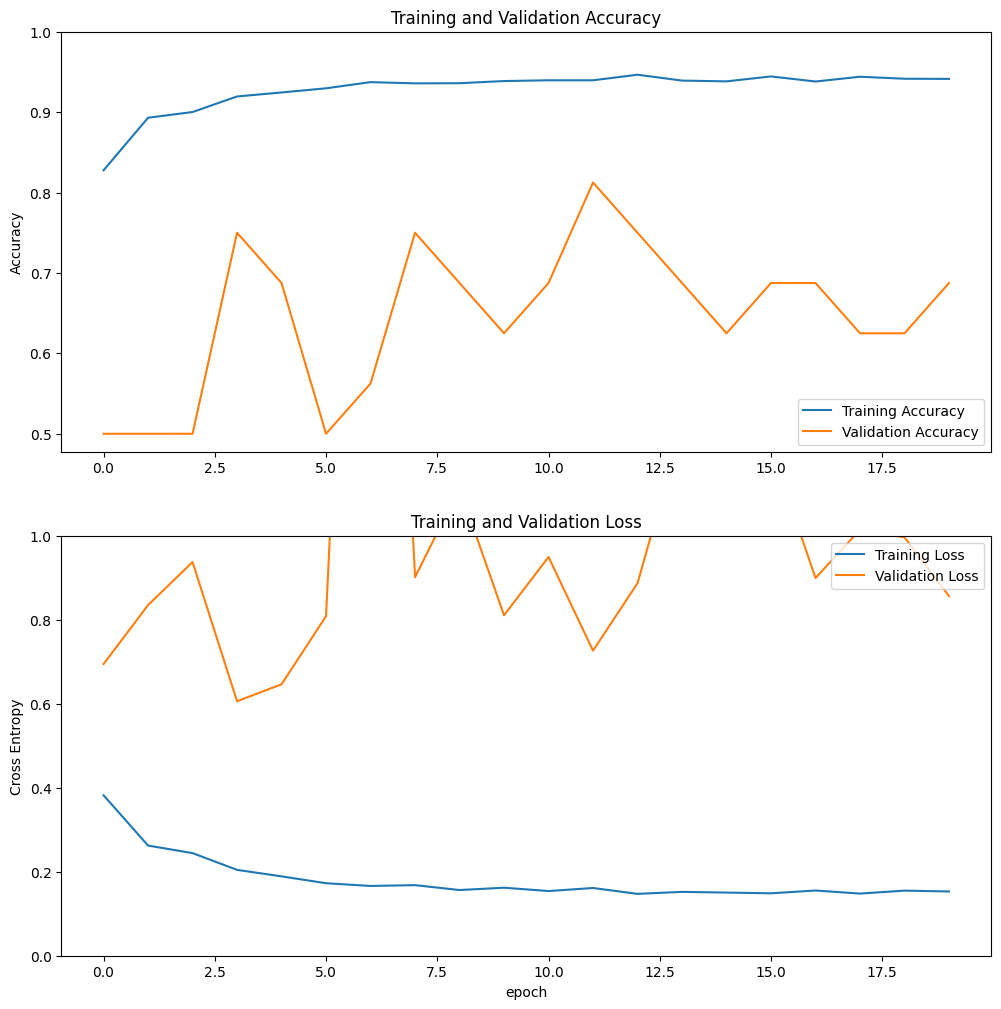

In [231]:
# analyze the training history
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

              precision    recall  f1-score   support

      Normal       0.90      0.91      0.91       390
   Pneumonia       0.84      0.84      0.84       234

    accuracy                           0.88       624
   macro avg       0.87      0.87      0.87       624
weighted avg       0.88      0.88      0.88       624



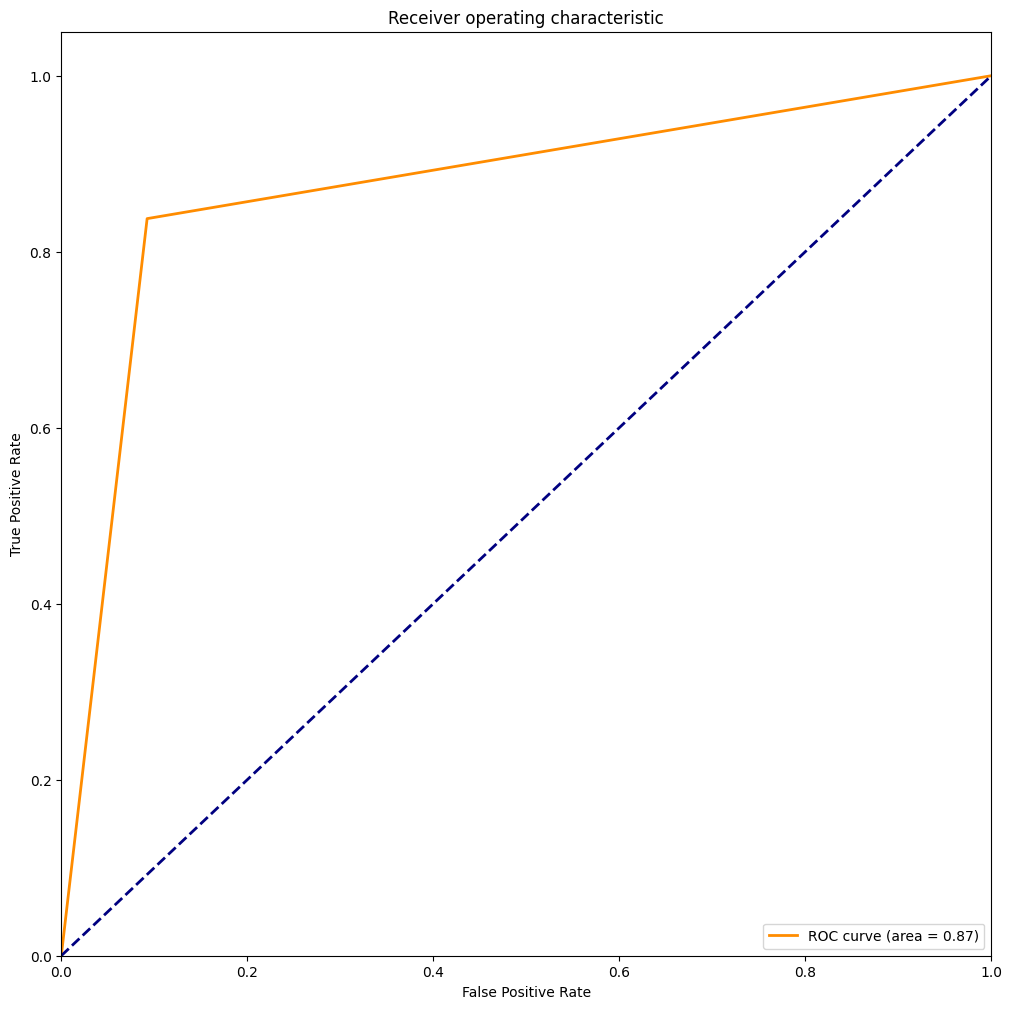

In [232]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=LABELS))

# ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [235]:
# predictions on test data
pred = pneumonia_clf.predict(x_test)
pred = np.round(pred)
pred = pred.astype(int)
pred = pred.reshape(-1)
pred[:10]

20/20 [==============================] - 0s 3ms/step


array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [244]:
# compare correct and incorrect predictions
correct = np.nonzero(pred == y_test)[0]
incorrect = np.nonzero(pred != y_test)[0]

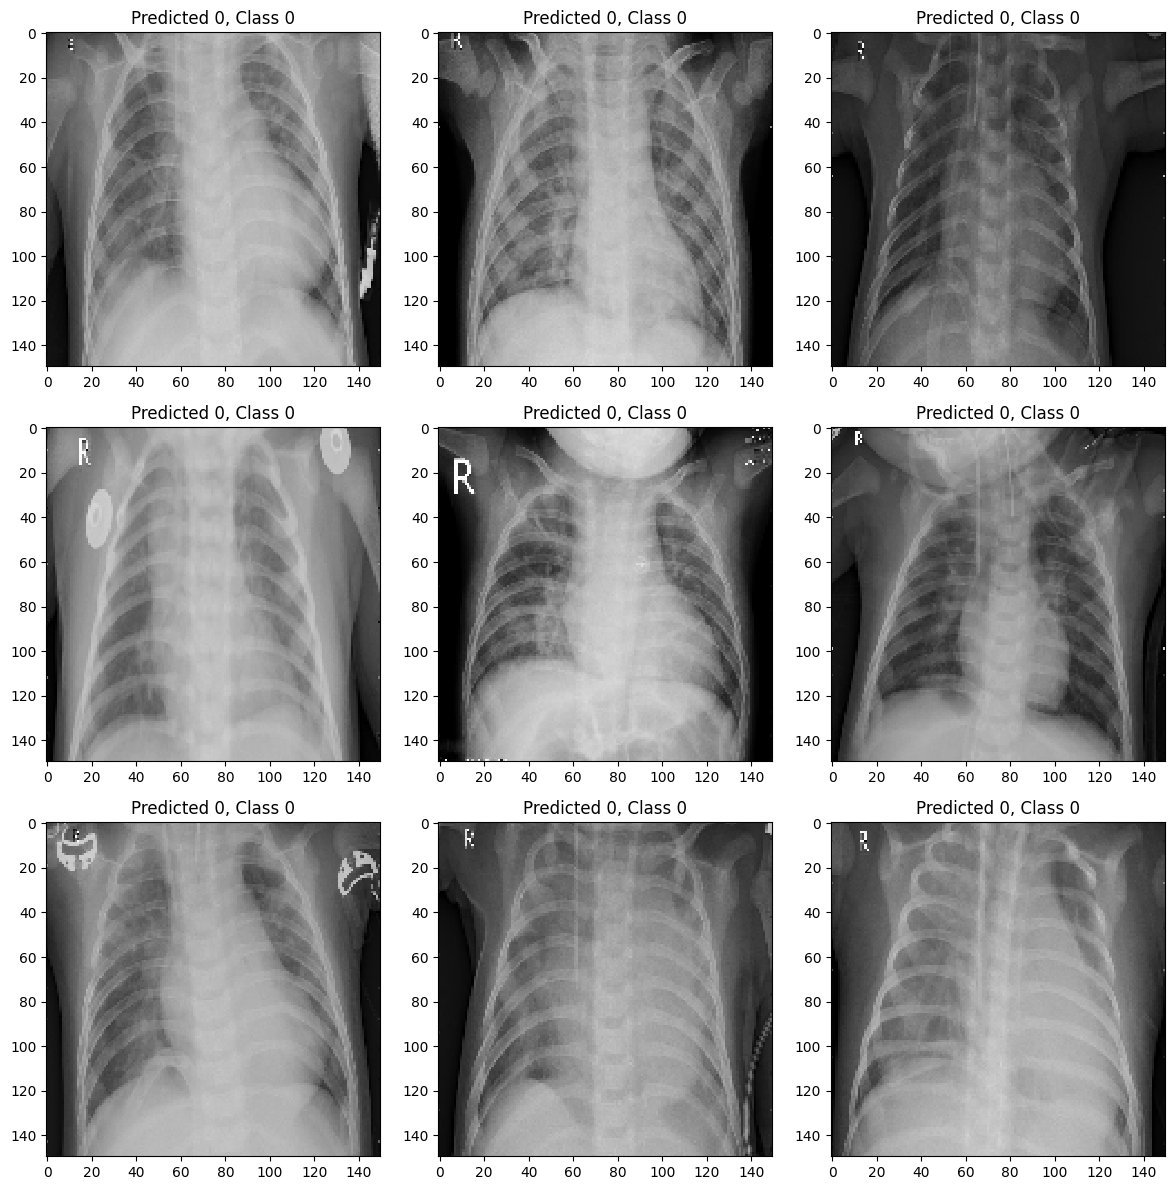

In [245]:
# visualize correct predictions
plt.figure(figsize=(12, 12))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[correct].reshape(img_size, img_size), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred[correct], y_test[correct]))
    plt.tight_layout()

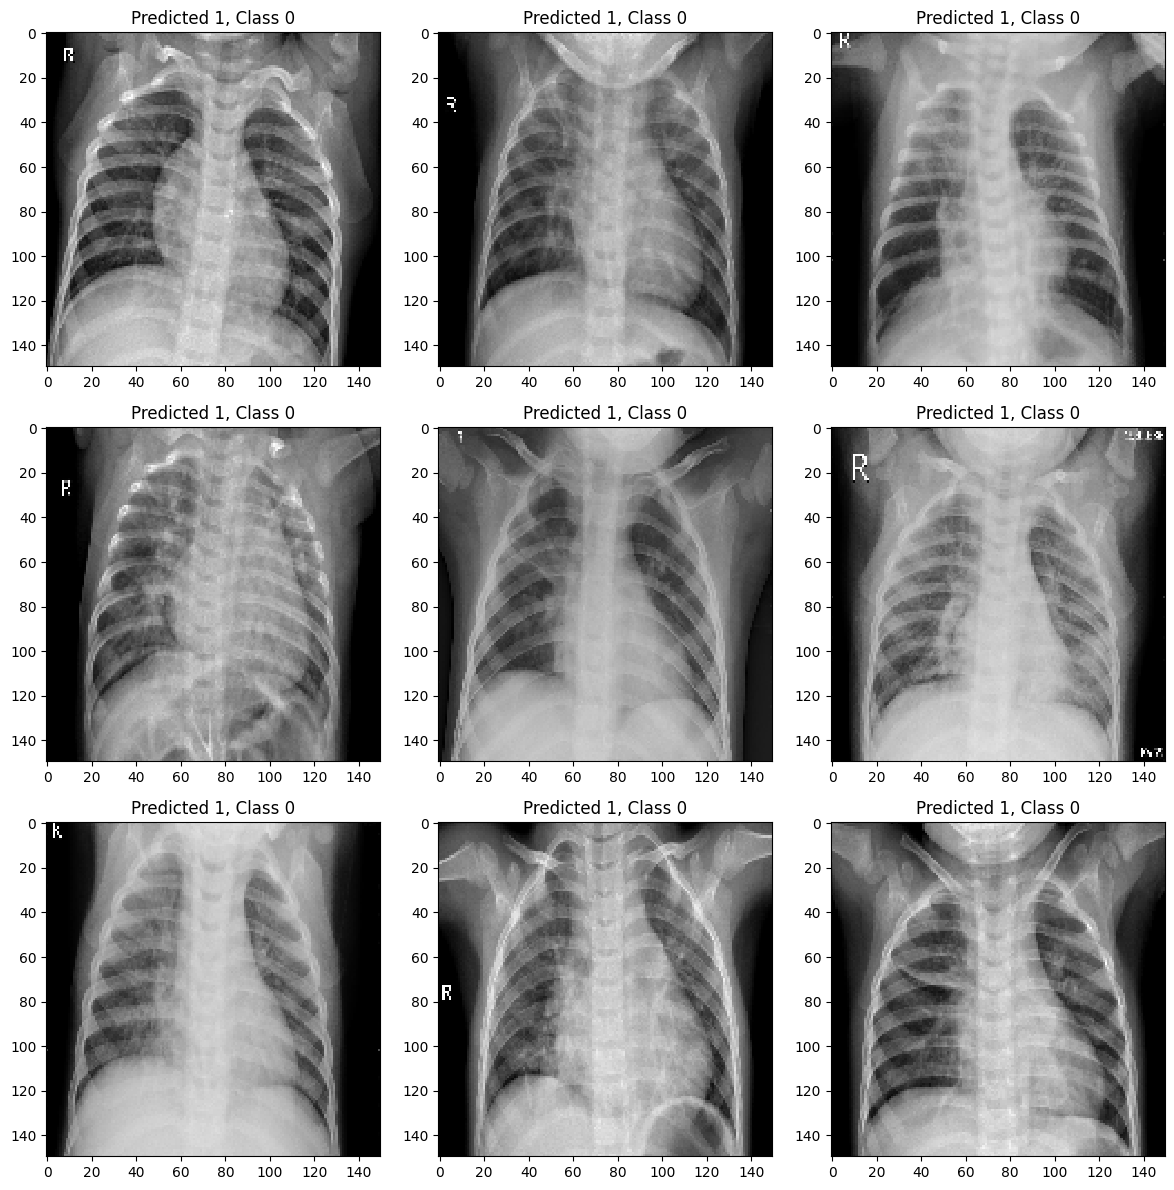

In [240]:
# visualize incorrect predictions
plt.figure(figsize=(12, 12))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[incorrect].reshape(img_size, img_size), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [241]:
# save the CNN
pneumonia_clf.save('models/pneumonia.h5')

## Task 3: Integrated Gradients

In [1]:
# load model
from keras.models import load_model
pneumonia_clf = load_model('models/pneumonia.h5')

2023-03-12 10:11:58.836644: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 10:11:59.026498: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-12 10:11:59.049548: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 10:11:59.049561: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [17]:
# integrated gradient method
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from captum.attr import IntegratedGradients
ig = IntegratedGradients(pneumonia_clf)

# visualize the integrated gradients
def visualize_ig(image, label, pred, attributions):
    fig, ax = plt.subplots(1, 2, figsize=(12, 12))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title(f'Original Image (Label: {label}, Prediction: {pred})')
    ax[1].imshow(attributions, cmap='gray')
    ax[1].set_title('Attributions')
    plt.show()

In [19]:
# visualize the integrated gradients for 5 healthy samples
for i in range(5):
    image = x_test[i].reshape(img_size, img_size)
    image = torch.tensor(image, requires_grad=True)
    label = y_test[i]
    pred = pneumonia_clf.predict(x_test[i].reshape(1, img_size, img_size, 1))
    pred = np.round(pred)
    pred = pred.astype(int)
    pred = pred.reshape(-1)
    pred = pred[0]
    attributions, delta = ig.attribute(image, target=label, return_convergence_delta=True)
    visualize_ig(image, label, pred, attributions)

1/1 [==============================] - 0s 22ms/step


AttributeError: Exception encountered when calling layer 'sequential_27' (type Sequential).

'torch.Size' object has no attribute 'rank'

Call arguments received by layer 'sequential_27' (type Sequential):
  • inputs=tensor([[4.9789e-04, 5.0012e-04, 4.9345e-04,  ..., 9.1132e-05, 9.1132e-05,
         8.2241e-05],
        [4.9567e-04, 4.8900e-04, 4.5788e-04,  ..., 7.3350e-05, 6.2237e-05,
         6.2237e-05],
        [4.6900e-04, 4.5788e-04, 4.6011e-04,  ..., 2.4006e-04, 1.9338e-04,
         2.4006e-04],
        ...,
        [2.1948e-01, 1.4502e-01, 9.0145e-02,  ..., 9.7984e-02, 5.8006e-01,
         3.5274e-01],
        [2.4692e-01, 1.9989e-01, 1.2542e-01,  ..., 7.8387e-02, 7.0548e-01,
         2.1164e-01],
        [2.6652e-01, 1.9989e-01, 1.5285e-01,  ..., 3.1747e-01, 3.2139e-01,
         6.6629e-02]], dtype=torch.float64, grad_fn=<CatBackward0>)
  • training=None
  • mask=None